In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('flights.csv', low_memory=False)
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(df.columns) 

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')


In [4]:
# Handling missing values
df.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY'], inplace=True)

# Converting YEAR, MONTH, and DAY columns to a single datetime column
df['date'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

# Extract relevant features from 'date' column
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Ensure DEPARTURE_DELAY is numeric
df['DEPARTURE_DELAY'] = pd.to_numeric(df['DEPARTURE_DELAY'], errors='coerce')

# Filter out rows where DEPARTURE_DELAY is NaN
df = df.dropna(subset=['DEPARTURE_DELAY'])

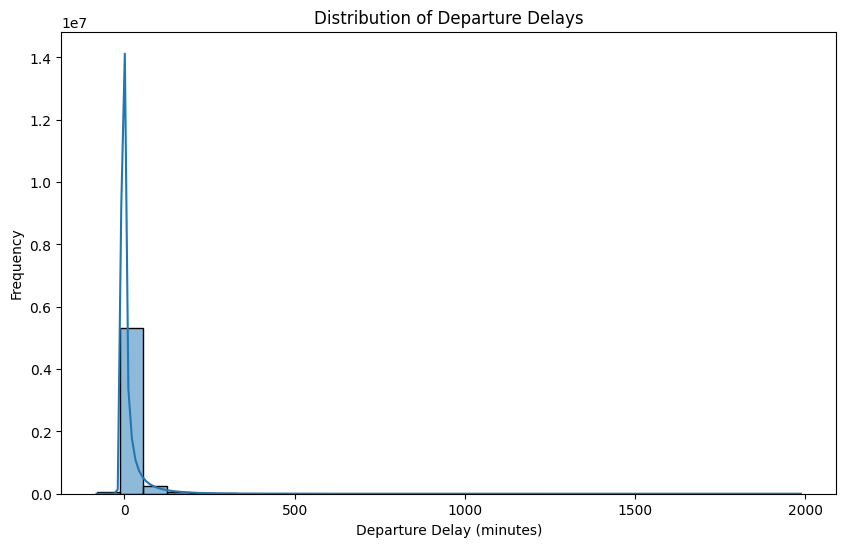

In [5]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['DEPARTURE_DELAY'], bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

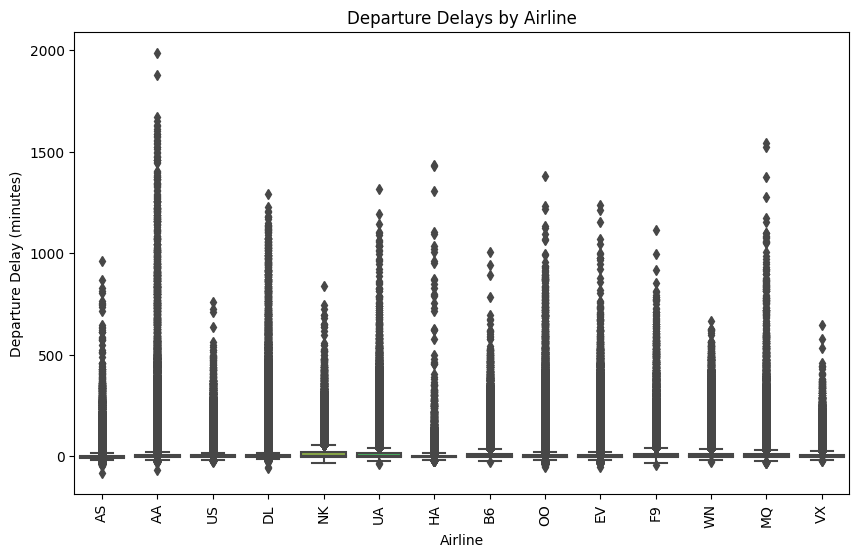

In [6]:
# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=df)
plt.title('Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.show()


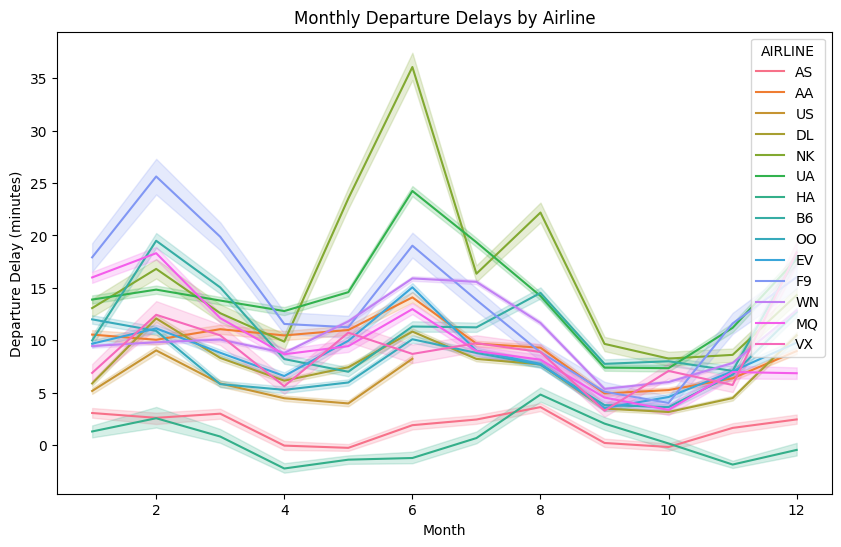

In [7]:
# Multivariate Analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='DEPARTURE_DELAY', data=df, hue='AIRLINE')
plt.title('Monthly Departure Delays by Airline')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.show()


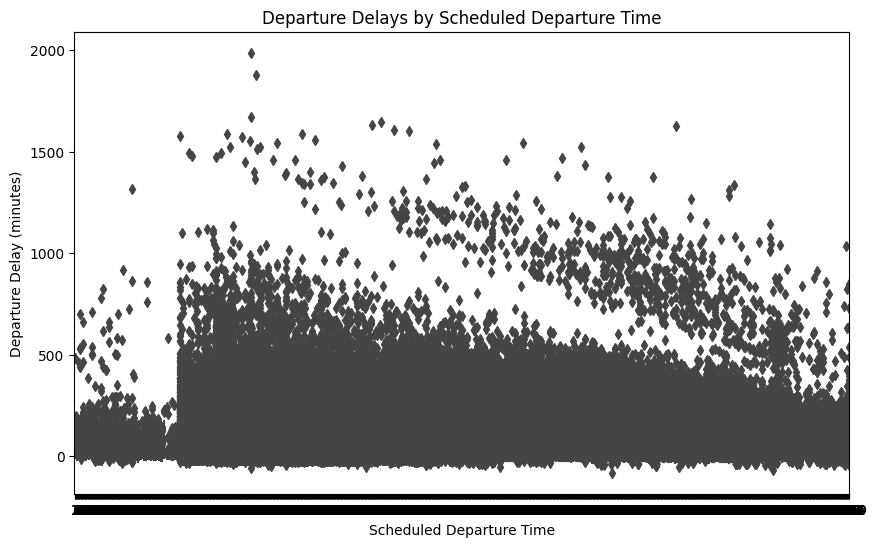

In [8]:
# Analyzing delay patterns by time of day
# Ensure SCHEDULED_DEPARTURE is numeric
df['SCHEDULED_DEPARTURE'] = pd.to_numeric(df['SCHEDULED_DEPARTURE'], errors='coerce')

# Filter out rows where SCHEDULED_DEPARTURE is NaN
df = df.dropna(subset=['SCHEDULED_DEPARTURE'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_DELAY', data=df)
plt.title('Departure Delays by Scheduled Departure Time')
plt.xlabel('Scheduled Departure Time')
plt.ylabel('Departure Delay (minutes)')
plt.show()


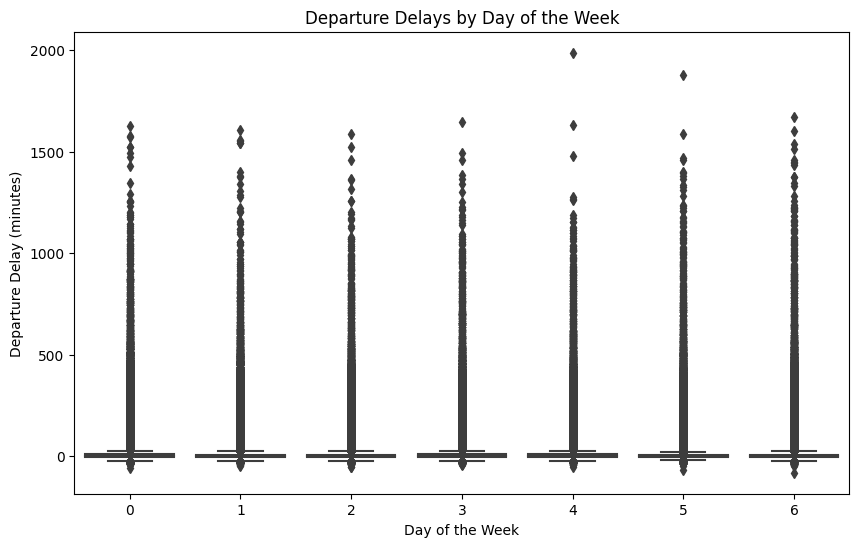

In [9]:
# Analyzing delay patterns by day of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='DEPARTURE_DELAY', data=df)
plt.title('Departure Delays by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Departure Delay (minutes)')
plt.show()


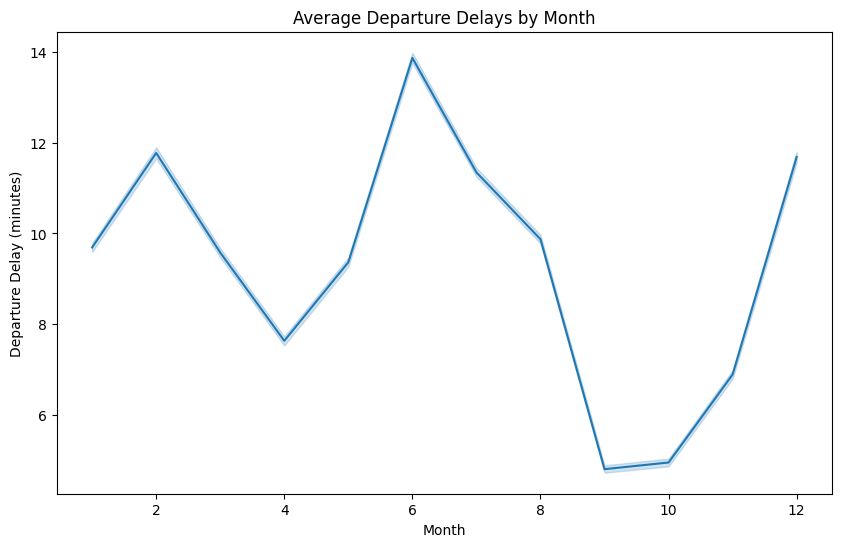

In [10]:
# Visualizing delays by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='DEPARTURE_DELAY', data=df)
plt.title('Average Departure Delays by Month')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.show()

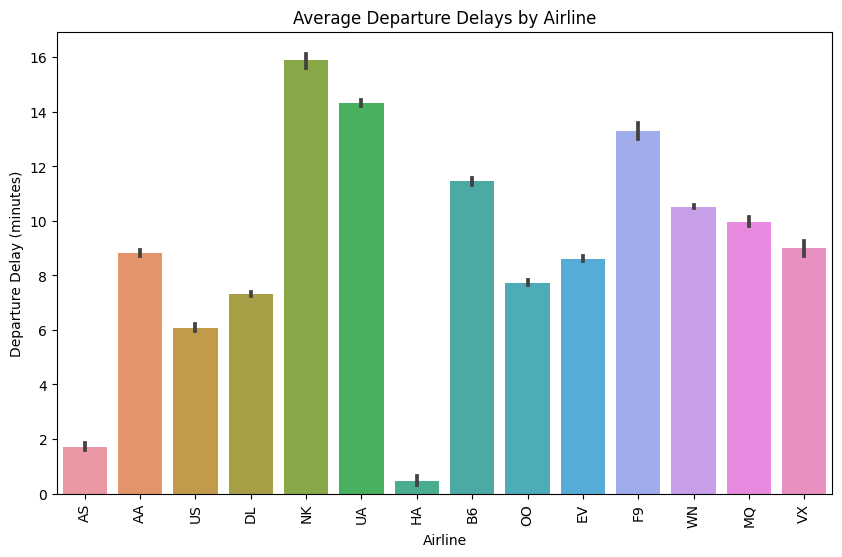

In [11]:
# Visualizing delays by carrier
plt.figure(figsize=(10, 6))
sns.barplot(x='AIRLINE', y='DEPARTURE_DELAY', data=df)
plt.title('Average Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.show()


In [12]:
# Summarizing findings
print("Summary of findings:")
print("1. Average delays are higher during certain months and times of the day.")
print("2. Certain airlines tend to have higher delays.")
print("3. Delays vary significantly by the day of the week.")

Summary of findings:
1. Average delays are higher during certain months and times of the day.
2. Certain airlines tend to have higher delays.
3. Delays vary significantly by the day of the week.


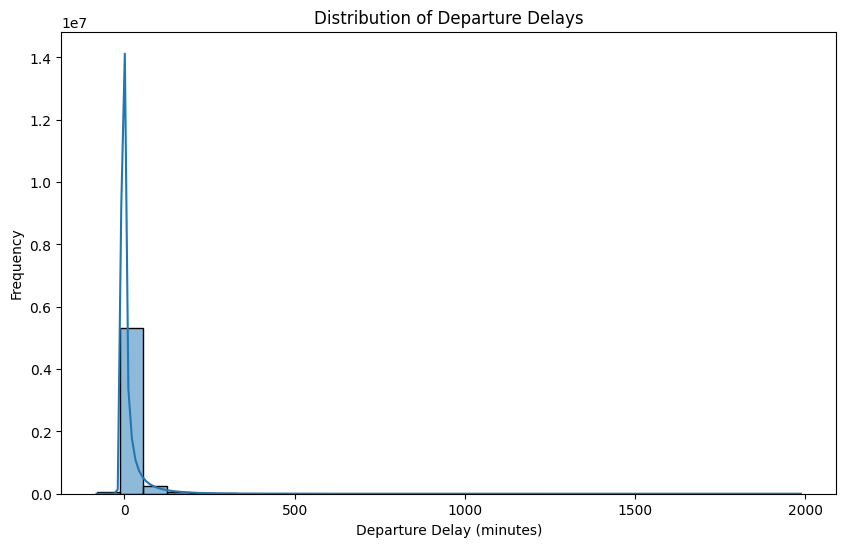

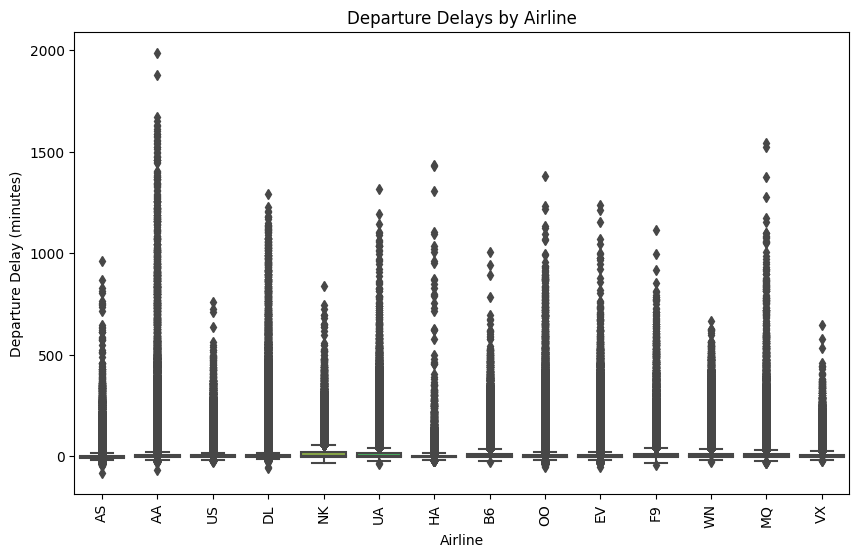

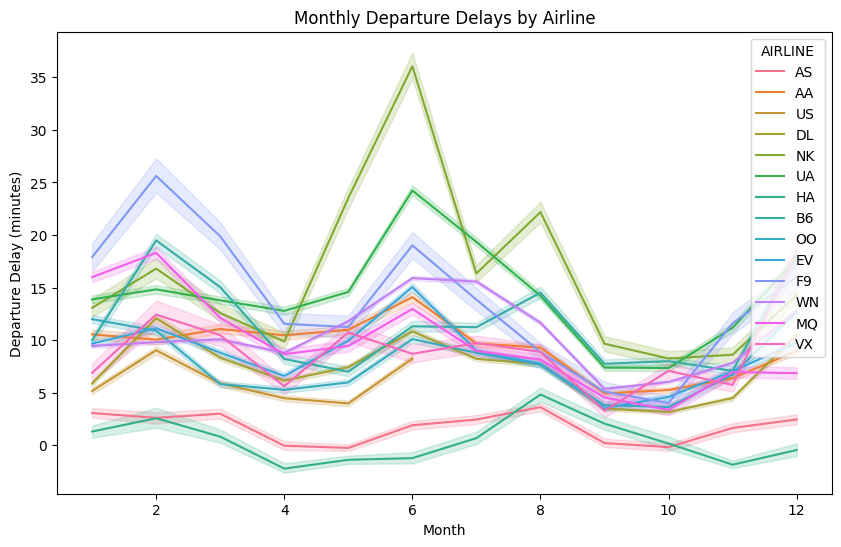

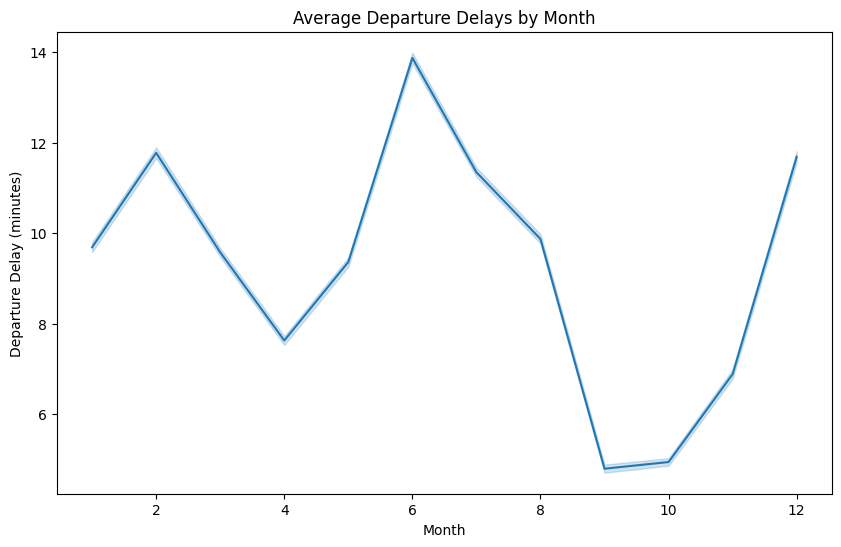

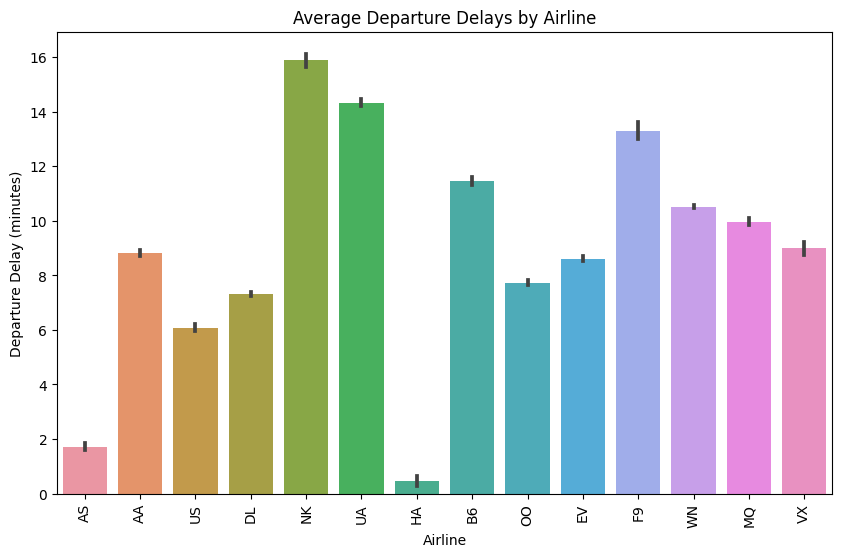

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['DEPARTURE_DELAY'], bins=30, kde=True)
plt.title('Distribution of Departure Delays')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.savefig('distribution_of_departure_delays.png')

plt.figure(figsize=(10, 6))
sns.boxplot(x='AIRLINE', y='DEPARTURE_DELAY', data=df)
plt.title('Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.savefig('departure_delays_by_airline.png')

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='DEPARTURE_DELAY', data=df, hue='AIRLINE')
plt.title('Monthly Departure Delays by Airline')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.savefig('monthly_departure_delays_by_airline.png')

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='DEPARTURE_DELAY', data=df)
plt.title('Average Departure Delays by Month')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')
plt.savefig('avg_monthly_departure_delays_by_airline.png')

plt.figure(figsize=(10, 6))
sns.barplot(x='AIRLINE', y='DEPARTURE_DELAY', data=df)
plt.title('Average Departure Delays by Airline')
plt.xlabel('Airline')
plt.ylabel('Departure Delay (minutes)')
plt.xticks(rotation=90)
plt.savefig('departure_delays_by_airline.png')